# Exploratory Data Analysis (EDA)
---
---

## Imports and Paths
---

In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(sys.path[-1])

/home/cotsios/dsit/2nd-semester/im-anal-and-proc/assignment_2


In [2]:
BASE_DIR = os.path.dirname(os.getcwd())
DATA_DIR  = os.path.join(BASE_DIR, 'chest_xray')

print(BASE_DIR)
print(DATA_DIR)

/home/cotsios/dsit/2nd-semester/im-anal-and-proc/assignment_2
/home/cotsios/dsit/2nd-semester/im-anal-and-proc/assignment_2/chest_xray


In [3]:
from src.visualizations import (
    plot_dataset_distribution,
    plot_image_grid_all_subsets, plot_intensity_distributions
)

## Distribution of Samples
---

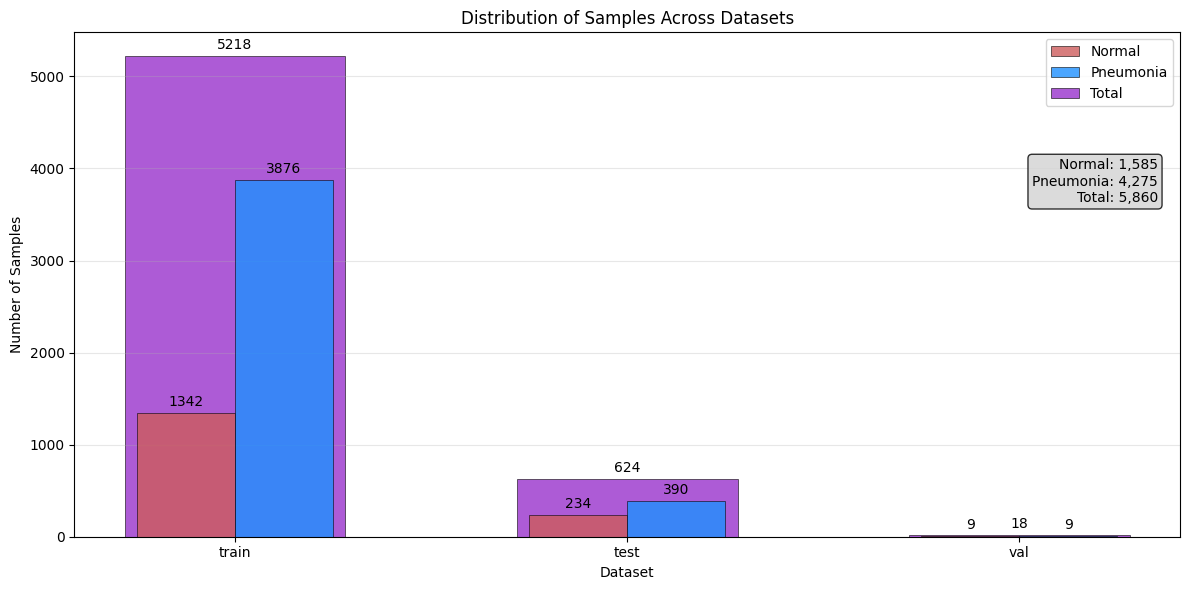

In [4]:
counts = plot_dataset_distribution(DATA_DIR)

In [5]:
counts

{'train': {'NORMAL': 1342, 'PNEUMONIA': 3876},
 'test': {'NORMAL': 234, 'PNEUMONIA': 390},
 'val': {'NORMAL': 9, 'PNEUMONIA': 9}}

## The splits
---
Since the samples are not distributed between the train, test, and validation sets in a manner that I would prefer, I will merge them and create a new `train`, `test`, and `val` sets. Also I will use data augmentation techniques to generate some more `NORMAL` images.

In [10]:
normals_needed = sum(
    [v["PNEUMONIA"] for v in counts.values()]
) - sum(
    [v["NORMAL"] for v in counts.values()]
)

train_ratio, test_ratio, val_ratio = 0.7, 0.2, 0.1

print(
    "New :: "
    f"Train ratio: {train_ratio}, "
    f"Test ratio: {test_ratio}, "
    f"Val ratio: {val_ratio}"
)
print(f"Normals needed: {normals_needed}")

New :: Train ratio: 0.7, Test ratio: 0.2, Val ratio: 0.1
Normals needed: 2690


## Random image inspection
---

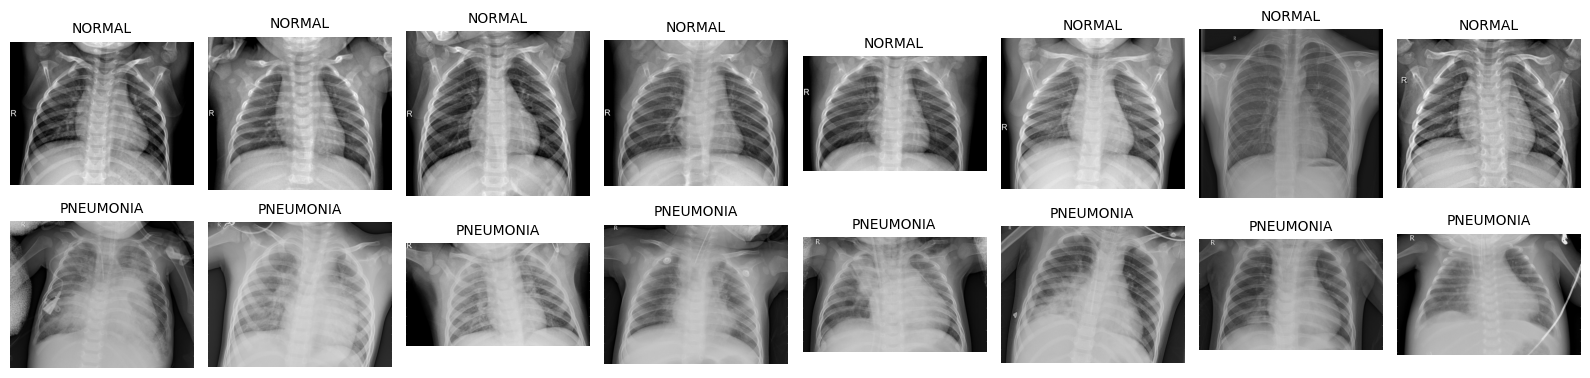

In [7]:
plot_image_grid_all_subsets(
    base_dir=DATA_DIR,
    n=16
)

## Intensity distribution
---


--- Class: NORMAL ---
  Number of images (N): 1583
  Mean histogram range: min=8.9093e-05, max={np.max(mean_hist):.4e}
  Std Dev of normalized histograms range: min=3.1449e-04, max=4.4566e-02
  Distance between upper/lower Std Dev lines (Mean ± SD, floored at 0) range: min=4.0729e-04, max=8.9132e-02
---

--- Class: PNEUMONIA ---
  Number of images (N): 4273
  Mean histogram range: min=3.1423e-05, max={np.max(mean_hist):.4e}
  Std Dev of normalized histograms range: min=1.0069e-04, max=5.2360e-02
  Distance between upper/lower Std Dev lines (Mean ± SD, floored at 0) range: min=1.3544e-04, max=9.0843e-02
---


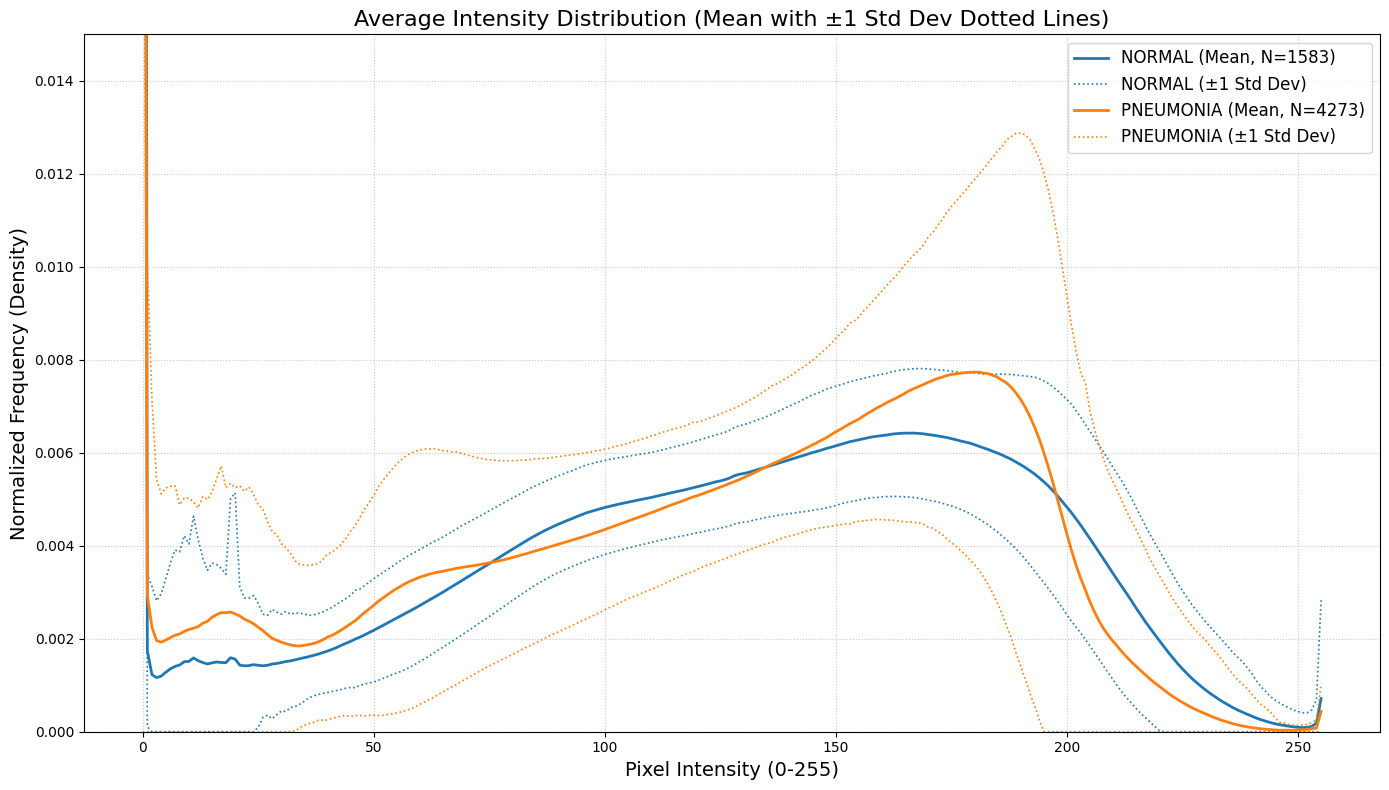

In [ ]:
plot_intensity_distributions(
    base_path=DATA_DIR,
    ylim = (0, 0.015)   # Adjusted as needed for better visibility
)